# Import thư viện

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import set_config
import seaborn as sns; sns.set()
import matplotlib.cm as cm
set_config(display='diagram')

# Đọc dữ liệu

In [2]:
path_to_data = '../data'
path_track = os.path.join(path_to_data, '20210824_212829_tracks.tsv')
path_playlist = os.path.join(path_to_data, '20210824_212829_playlists.tsv')
path_audio =  os.path.join(path_to_data, '20210824_212829_audios.tsv')
path_artist =  os.path.join(path_to_data, '20210824_212829_artists.tsv')

In [3]:
pd_track = pd.read_csv(path_track, sep='\t')
pd_audio = pd.read_csv(path_audio, sep='\t')
pd_playlist = pd.read_csv(path_playlist, sep='\t')
pd_artist = pd.read_csv(path_artist, sep='\t')

In [4]:
pd_audio

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
1,27NovPIUIRrOZoCHxABJwK,0.736,0.704,3,-7.409,0,0.0615,0.0203,0.000000,0.0501,0.894,149.995,4
2,3Vi5XqYrmQgOYBajMWSvCi,0.664,0.609,1,-6.509,1,0.0707,0.3040,0.000000,0.0926,0.194,130.041,4
3,6PQ88X9TkUIAUIZJHW2upE,0.808,0.897,11,-3.712,0,0.0348,0.0469,0.000031,0.3640,0.591,126.026,4
4,3Wrjm47oTz2sjIgck11l5e,0.714,0.800,11,-4.808,0,0.0504,0.1270,0.000000,0.3590,0.589,134.002,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69866,3Zuf70897YkrVRAsrBMMSF,0.751,0.753,0,-8.198,1,0.0935,0.2270,0.000784,0.2090,0.774,106.976,4
69867,1MDoll6jK4rrk2BcFRP5i7,0.471,0.431,5,-6.129,0,0.0342,0.3290,0.000000,0.0854,0.289,157.980,4
69868,7DqTaelFf846rl1CHmyfOW,0.506,0.433,2,-14.183,0,0.0345,0.8420,0.031100,0.1120,0.641,83.222,4
69869,0ygTmpa6uSotkBkTiwcMZ4,0.493,0.590,0,-5.814,0,0.0392,0.3390,0.000000,0.1210,0.502,169.908,4


In [5]:
pd_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69871 entries, 0 to 69870
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                69871 non-null  object 
 1   danceability      69871 non-null  float64
 2   energy            69871 non-null  float64
 3   key               69871 non-null  int64  
 4   loudness          69871 non-null  float64
 5   mode              69871 non-null  int64  
 6   speechiness       69871 non-null  float64
 7   acousticness      69871 non-null  float64
 8   instrumentalness  69871 non-null  float64
 9   liveness          69871 non-null  float64
 10  valence           69871 non-null  float64
 11  tempo             69871 non-null  float64
 12  time_signature    69871 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 6.9+ MB


In [6]:
pd_track

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100
1,37i9dQZF1DXcBWIGoYBM5M,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),212000,"['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...","['Lil Nas X', 'Jack Harlow']",622NFw5Yk0OReMJ2XWcXUh,INDUSTRY BABY (feat. Jack Harlow),97
2,37i9dQZF1DXcBWIGoYBM5M,3Vi5XqYrmQgOYBajMWSvCi,Need To Know,210560,['5cj0lLjcoR7YOSnhnX0Po5'],['Doja Cat'],1nAQbHeOWTfQzbOoFrvndW,Planet Her,92
3,37i9dQZF1DXcBWIGoYBM5M,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,231041,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],01NhUvviMytvV12pmJiDZH,Bad Habits,98
4,37i9dQZF1DXcBWIGoYBM5M,3Wrjm47oTz2sjIgck11l5e,Beggin',211560,['0lAWpj5szCSwM4rUMHYmrr'],['Måneskin'],2qJw6w5XwQO0PQlSWPu7Tw,Chosen,99
...,...,...,...,...,...,...,...,...,...
88814,4lgseztVwmKQ8MNETPVIny,5kqIPrATaCc2LqxVWzQGbk,7 Years,237300,['25u4wHJWxCA9vO0CzxAbK7'],['Lukas Graham'],4rFrdkSWs0dtj0rWPzOk1v,Lukas Graham,79
88815,4lgseztVwmKQ8MNETPVIny,3FCto7hnn1shUyZL42YgfO,Piano Man,336093,['6zFYqv1mOsgBRQbae3JJ9e'],['Billy Joel'],7r36rel1M4gyBavfcJP6Yz,The Essential Billy Joel,66
88816,4lgseztVwmKQ8MNETPVIny,3XVBdLihbNbxUwZosxcGuJ,If I Ain't Got You,228706,['3DiDSECUqqY1AuBP8qtaIa'],['Alicia Keys'],6TqRKHLjDu5QZuC8u5Woij,The Diary Of Alicia Keys,78
88817,4lgseztVwmKQ8MNETPVIny,6QPKYGnAW9QozVz2dSWqRg,Someone Like You,285240,['4dpARuHxo51G3z768sgnrY'],['Adele'],7n3QJc7TBOxXtlYh4Ssll8,21,13


In [7]:
pd_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88819 entries, 0 to 88818
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   playlist_id     88819 non-null  object
 1   track_id        88819 non-null  object
 2   track_name      88812 non-null  object
 3   track_duration  88819 non-null  int64 
 4   artist_ids      88819 non-null  object
 5   artist_names    88819 non-null  object
 6   album_id        88819 non-null  object
 7   album_name      88811 non-null  object
 8   popularity      88819 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 6.1+ MB


In [8]:
pd_playlist

,playlist_id,playlist_name,playlist_description,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
1,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,"New music from Young Thug, Trippie Redd, Rod W...",50,14030878
2,37i9dQZF1DX1lVhptIYRda,Hot Country,"Today's top country hits of the week, worldwid...",53,6475778
3,37i9dQZF1DX10zKzsJ2jva,¡Viva Latino!,"Today's top Latin hits are right here, on ¡Viv...",50,11218997
4,37i9dQZF1DX4JAvHpjipBk,New Music Friday,"New music from Lorde, Young Thug, Ed Sheeran, ...",100,3788318
...,...,...,...,...,...
1390,37i9dQZF1DX3WvGXE8FqYX,Women of Pop,Kick back with the queens of pop.,70,2185426
1391,5ji4GZJpll6twskFvKxiHx,dw-c,NaN,50,14
1392,40VxbK9NqccdUDUpiUXmbp,dw_g,NaN,30,8
1393,0RTz1jFo5BXGPfI8eVf8sj,Top Shower Songs,NaN,100,57


In [9]:
pd_playlist.fillna('None')

,playlist_id,playlist_name,playlist_description,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
1,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,"New music from Young Thug, Trippie Redd, Rod W...",50,14030878
2,37i9dQZF1DX1lVhptIYRda,Hot Country,"Today's top country hits of the week, worldwid...",53,6475778
3,37i9dQZF1DX10zKzsJ2jva,¡Viva Latino!,"Today's top Latin hits are right here, on ¡Viv...",50,11218997
4,37i9dQZF1DX4JAvHpjipBk,New Music Friday,"New music from Lorde, Young Thug, Ed Sheeran, ...",100,3788318
...,...,...,...,...,...
1390,37i9dQZF1DX3WvGXE8FqYX,Women of Pop,Kick back with the queens of pop.,70,2185426
1391,5ji4GZJpll6twskFvKxiHx,dw-c,None,50,14
1392,40VxbK9NqccdUDUpiUXmbp,dw_g,None,30,8
1393,0RTz1jFo5BXGPfI8eVf8sj,Top Shower Songs,None,100,57


In [10]:
pd_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   playlist_id             1395 non-null   object
 1   playlist_name           1395 non-null   object
 2   playlist_description    1239 non-null   object
 3   playlist_num_tracks     1395 non-null   int64 
 4   playlist_num_followers  1395 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 54.6+ KB


In [11]:
pd_artist

,id,name,followers,popularity,genres
0,2xgAJkalFHfceCNGETOkyM,GRX,76585,43,[]
1,6enyYil5r9snkIazgAX5DG,Jo Ann Kelly,998,20,['british blues']
2,40oYPr305MsT2lsiXr9fX9,The Boomtown Rats,116274,54,"['new romantic', 'new wave', 'new wave pop', '..."
3,3i8iJVU0mtgzbZsuF1AoJ3,sad alex,23548,52,"['alt z', 'modern indie pop']"
4,5oFkj1qSlyBUmV5d6Edgtq,Cozz,146831,57,['underground hip hop']
...,...,...,...,...,...
34649,1tY6Z4NEPI3xHhVA8VU9Jl,Vishwa Mohan Bhatt,23094,30,"['hindustani classical', 'hindustani instrumen..."
34650,7lPv78tlT005m22dYvSdNg,Lindsey Leblanc,52,32,[]
34651,6iXZPP5qLB2dtIQ4WuNk9M,Thelonious Coltrane,4359,44,"['chillhop', 'jazz boom bap', 'lo-fi jazzhop']"
34652,7s9LTAKRwkBQ0CqWlbE254,Frase,2245,36,[]


In [12]:
pd_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34654 entries, 0 to 34653
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          34654 non-null  object
 1   name        34654 non-null  object
 2   followers   34654 non-null  int64 
 3   popularity  34654 non-null  int64 
 4   genres      34654 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


# Mô tả dữ liệu

## Ý nghĩa mỗi cột

### Audio

In [13]:
pd.read_csv('./data_description/des_audio.csv')

,column name,data type,meaning,example
0,id,string,The Spotify ID for the track,5HCyWlXZPP0y6Gqq8TgA20
1,danceability,float,Danceability describes how suitable a track is...,0.591
2,energy,float,Energy is a measure from 0.0 to 1.0 and repres...,0.764
3,key,int,The key the track is in. Integers map to pitch...,1
4,loudness,float,The overall loudness of a track in decibels (d...,-5.484
5,mode,int,Mode indicates the modality (major or minor) o...,1
6,speechiness,float,Speechiness detects the presence of spoken wor...,0.0483
7,acousticness,float,A confidence measure from 0.0 to 1.0 of whethe...,0.0383
8,instrumentalness,float,Predicts whether a track contains no vocals. “...,0
9,liveness,float,Detects the presence of an audience in the rec...,0.103


**Câu 1:** Phân tích phân phối của các thuộc tính audio

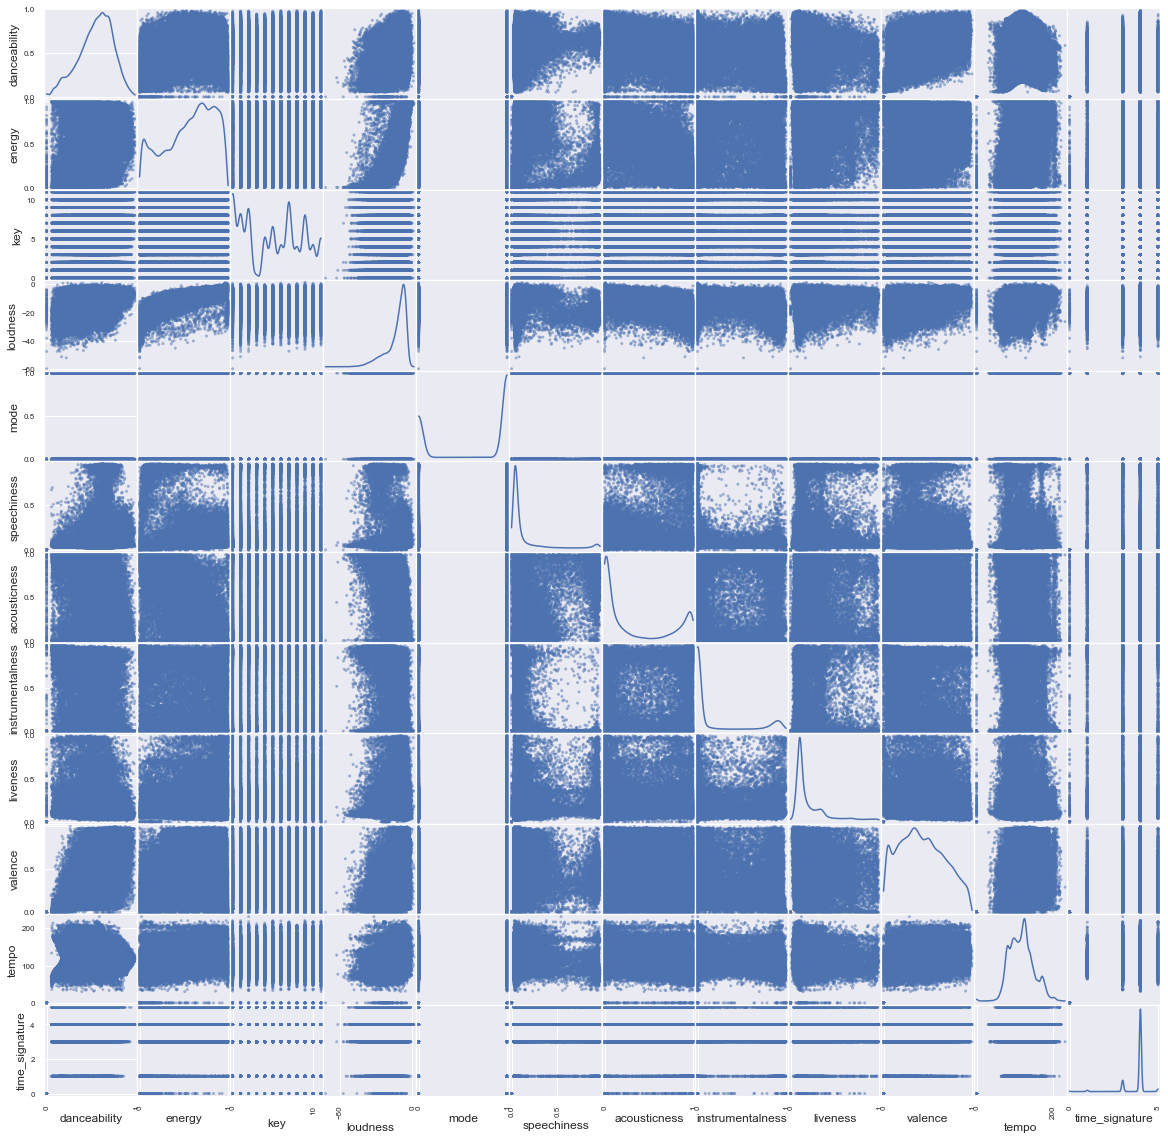

In [14]:
pd.plotting.scatter_matrix(pd_audio, diagonal="kde", figsize=(20, 20))
plt.show()

+ Ngoài các cột categorical như là `key`, `mode`, `time_signature`, thì các cột khác có kiểu dữ liệu là numerical

+ Các cột tuân theo phân phối chuẩn bao gồm `danceability`, `loudness`, `speechiness`, `liveness`, `valence`, `tempo`

### Track


In [15]:
pd.read_csv('./data_description/des_tracks.csv')

,column name,data type,meaning,example
0,playlist_id,string,The Spotify ID of the playlist,37i9dQZF1DXcBWIGoYBM5M
1,track_id,string,The Spotify ID for the track,5HCyWlXZPP0y6Gqq8TgA20
2,track_name,string,The name of the track,STAY (with Justin Bieber)
3,track_duration,int,The duration of the track in milliseconds,141805
4,artist_ids,list,A comma-separated list for the Spotify ID of ...,"[2tIP7SsRs7vjIcLrU85W8J, 1uNFoZAHBGtllmzznpCI3s]"
5,artist_names,list,A comma-separated list of artists name,"[The Kid LAROI, Justin Bieber]"
6,album_id,string,A comma-separated list of the Spotify IDs for...,4QLAtpLNUsHEYrcHXmMIZZ
7,album_name,string,Name of the album,STAY (with Justin Bieber)
8,popularity,int,"""The popularity of the track. The value will ...",with 100 being the most popular.
9,The popularity of a track is a value between 0...,with 100 being the most popular. The populari...,in the most part,on the total number of plays the track has ha...


### Playlist

In [16]:
pd.read_csv('./data_description/des_playlist.csv')

,column name,data type,meaning,example
0,playlist_id,string,The Spotify ID of the playlist,37i9dQZF1DXcBWIGoYBM5M
1,playlist_name,'string',The name of playlist,Today's Top Hits
2,playlist_description,'string',The description of playlist,Doja Cat is on top of the Hottest 50!
3,playlist_num_tracks,'int',Number of tracks in that playlist,50
4,playlist_num_followers,'int',Number of this playlist follower,29379379


**Câu 2:** Nhận xét về phân phối của các playlist dựa vào số lượng bài hát và số lượng người theo dõi

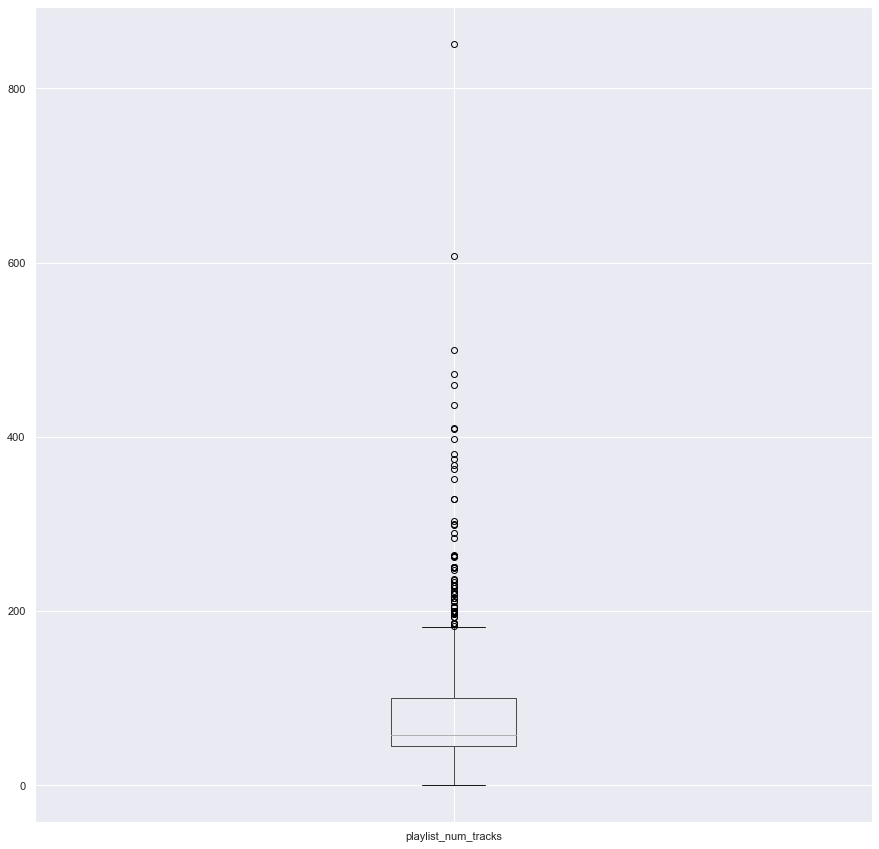

In [17]:
plt.figure(figsize=(15,15))
pd_playlist.boxplot(['playlist_num_tracks'])
plt.show()

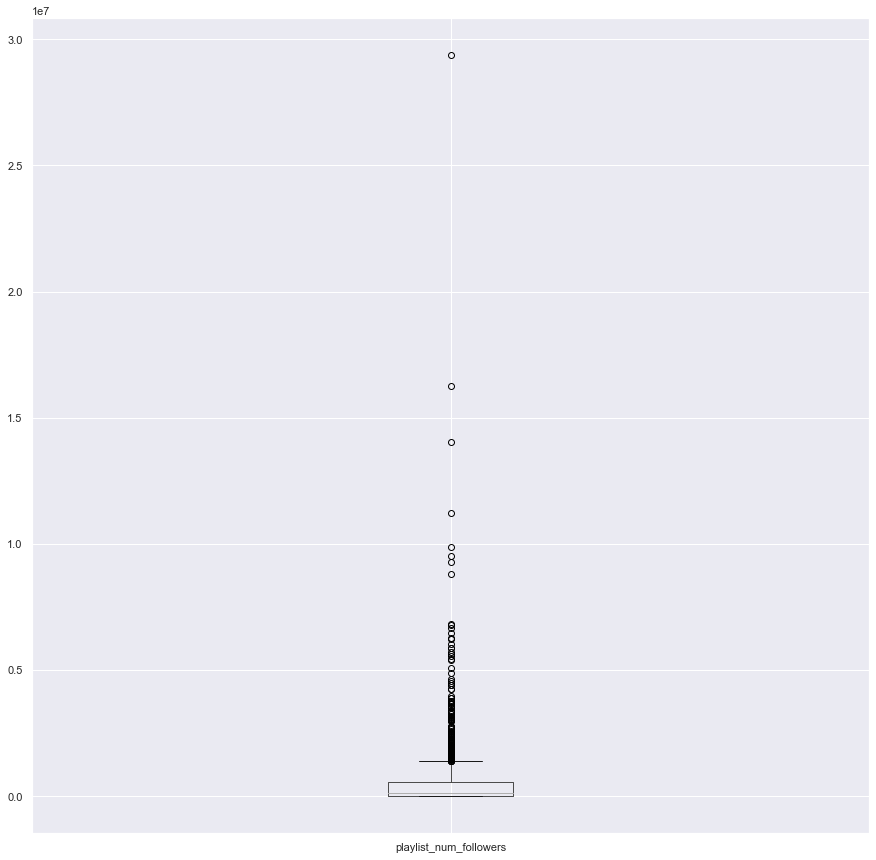

In [18]:
plt.figure(figsize=(15,15))
pd_playlist.boxplot(['playlist_num_followers'])
plt.show()

Nhìn chung phân phối không đồng đều, khi có tồn tại một vài playlist có lượng bài hát hoặc số lượng người theo dõi rất nhiều, điều này sẽ phần nào ảnh hưởng đến thuật toán khi sample ra các playlist được nhận định như là outlier này

### Artist

In [19]:
pd.read_csv('./data_description/des_artist.csv')

,column name,data type,meaning,example
0,id,string,The Spotify ID of artist,1uNFoZAHBGtllmzznpCI3s
1,name,string,Name of the artist,Justin Bieber
2,followers,int,Number of that artist follower,48927405
3,popularity,int,The popularity of the artist. The value will b...,98
4,genres,list,A comma seperated list of genres of that arti...,"['canadian pop', 'pop', 'post-teen pop']"


**Câu 3 :** Ca sĩ sẽ chọn hát dòng nhạc nào phổ biến nhất

<ipython-input-20-cac8adcebc12>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  genres = pd_artist.genres.str.replace('[','')
<ipython-input-20-cac8adcebc12>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  genres = genres.str.replace(']','')


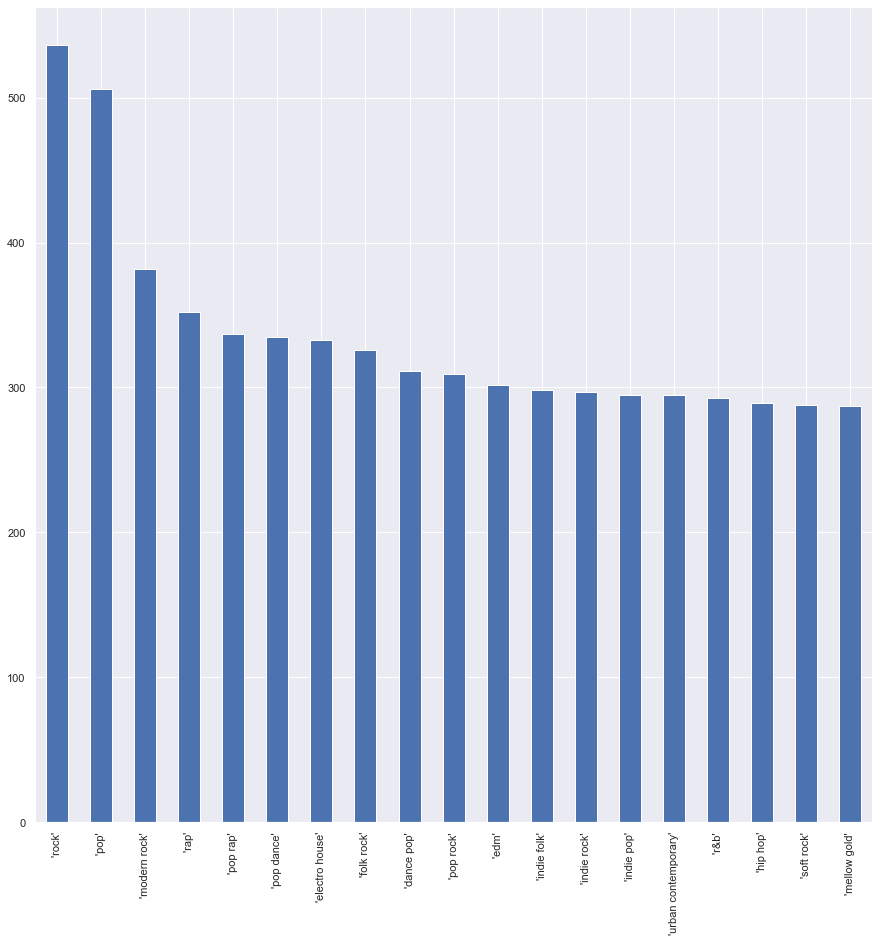

In [20]:
import re
genres = pd_artist.genres.str.replace('[','')
genres = genres.str.replace(']','')
genres = genres.str.split(',').explode()
most_genres = genres.value_counts()
# Top 10 genres
most_genres = most_genres[1:20]
plt.figure(figsize=(15,15))
most_genres.plot.bar()
plt.show()

## Cách tổ chức 

+ Dataframe `pd_track` mô tả thông tin về một playlist sẽ chứa các track nào, một `playlist_id` sẽ có thể có nhiều `track_id`. Ngoài ra còn một số thông tin khác ở đây chẳng hạn như độ phổ biến, thời lượng track,...
+ Sử dụng các `track_id` để truy xuất các thông tin đặc trưng về âm thanh tại dataframe `pd_audio`. Tại Dataframe này, các đặc trưng âm học sẽ được biểu diễn, đây sẽ là dataframe chúng ta sẽ thực hiện các công việc chuẩn hóa và tính toán độ dị biệt giữa các track

In [21]:
pd_track = pd.merge(pd_track, pd_audio, left_on = 'track_id', right_on = 'id')
pd_track

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity,id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
1,37i9dQZF1DXcRXFNfZr7Tp,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
2,37i9dQZF1DXc2aPBXGmXrt,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
3,37i9dQZF1DWYD2pxgooM7y,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
4,37i9dQZF1DWUa8ZRTfalHk,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88618,0RTz1jFo5BXGPfI8eVf8sj,3Zuf70897YkrVRAsrBMMSF,"You're The One That I Want - From ""Grease"" Ori...",168466,"['4hKkEHkaqCsyxNxXEsszVH', '4BoRxUdrcgbbq1rxJv...","['John Travolta', 'Olivia Newton-John']",0CbwlsDekgmAW03uMBjPBG,Grease (Deluxe Edition),0,3Zuf70897YkrVRAsrBMMSF,...,0,-8.198,1,0.0935,0.2270,0.000784,0.2090,0.774,106.976,4
88619,4lgseztVwmKQ8MNETPVIny,1MDoll6jK4rrk2BcFRP5i7,Hello,295502,['4dpARuHxo51G3z768sgnrY'],['Adele'],5y28RdPzIRXegzr5YM9Y0D,Hello,3,1MDoll6jK4rrk2BcFRP5i7,...,5,-6.129,0,0.0342,0.3290,0.000000,0.0854,0.289,157.980,4
88620,4lgseztVwmKQ8MNETPVIny,7DqTaelFf846rl1CHmyfOW,Chan Chan,257737,['11kBu957KTYoAltZHDm8gW'],['Buena Vista Social Club'],2Upqk0mMh9OMIVSj9F8Xzw,Buena Vista Social Club,0,7DqTaelFf846rl1CHmyfOW,...,2,-14.183,0,0.0345,0.8420,0.031100,0.1120,0.641,83.222,4
88621,4lgseztVwmKQ8MNETPVIny,0ygTmpa6uSotkBkTiwcMZ4,Warwick Avenue,226386,['37NqXwtb6nIEqRt4EJSoIO'],['Duffy'],4x0HJqUUDRvJLZbie95Ayk,Rockferry (Deluxe Edition),0,0ygTmpa6uSotkBkTiwcMZ4,...,0,-5.814,0,0.0392,0.3390,0.000000,0.1210,0.502,169.908,4


`pd_full` sẽ là một Dataframe tổng hợp tất cả thông tin bao gồm cả các đặc trưng về audio

In [22]:
pd_full = pd.merge(pd_track, pd_playlist, left_on = 'playlist_id', right_on = 'playlist_id')
pd.set_option('display.max_columns', None)
pd_full

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name,playlist_description,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
1,37i9dQZF1DXcBWIGoYBM5M,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),212000,"['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...","['Lil Nas X', 'Jack Harlow']",622NFw5Yk0OReMJ2XWcXUh,INDUSTRY BABY (feat. Jack Harlow),97,27NovPIUIRrOZoCHxABJwK,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
2,37i9dQZF1DXcBWIGoYBM5M,3Vi5XqYrmQgOYBajMWSvCi,Need To Know,210560,['5cj0lLjcoR7YOSnhnX0Po5'],['Doja Cat'],1nAQbHeOWTfQzbOoFrvndW,Planet Her,92,3Vi5XqYrmQgOYBajMWSvCi,0.664,0.609,1,-6.509,1,0.0707,0.304000,0.000000,0.0926,0.194,130.041,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
3,37i9dQZF1DXcBWIGoYBM5M,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,231041,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],01NhUvviMytvV12pmJiDZH,Bad Habits,98,6PQ88X9TkUIAUIZJHW2upE,0.808,0.897,11,-3.712,0,0.0348,0.046900,0.000031,0.3640,0.591,126.026,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
4,37i9dQZF1DXcBWIGoYBM5M,3Wrjm47oTz2sjIgck11l5e,Beggin',211560,['0lAWpj5szCSwM4rUMHYmrr'],['Måneskin'],2qJw6w5XwQO0PQlSWPu7Tw,Chosen,99,3Wrjm47oTz2sjIgck11l5e,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.589,134.002,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88618,3yUO32lGCEnAfFGORSEsy4,6jKNYORXeWGGGiSkj1sBZu,Cocky Tuff Up,170111,['5mYWkDD4b1eM4ZjFq5axxs'],['Aidonia'],4iSfhNdg4CcSoHBZ8MNR0S,Matte Black Riddim,0,6jKNYORXeWGGGiSkj1sBZu,0.776,0.924,7,-4.651,1,0.0580,0.243000,0.000075,0.1580,0.749,104.975,4,Raw Expression,Brukout edition: It's a raw and sexy dancehall...,42,307
88619,3yUO32lGCEnAfFGORSEsy4,5DycXVa4e82E6k9M15Nf51,Turn It Up (feat. DJ Jazzy T),220978,"['1RnGhd2JfN5nbVOvYmhDyO', '4DxQlFDzfkQjyU9mrq...","[""Ce'Cile"", 'DJ Jazzy T']",0ZEmsBG911uKT7CJxlF0DS,Still Running,6,5DycXVa4e82E6k9M15Nf51,0.646,0.947,7,-3.631,1,0.0772,0.000389,0.000057,0.8960,0.793,100.027,4,Raw Expression,Brukout edition: It's a raw and sexy dancehall...,42,307
88620,3yUO32lGCEnAfFGORSEsy4,41gA2hLHRJW4bC40lm2X7R,Cup Yah Full,227552,['21J3YJTyq1biE3SvSNjzuf'],['Capleton'],1GIhVkizUAMw7Zci6DMPdG,Cup Yah Full - Single,0,41gA2hLHRJW4bC40lm2X7R,0.507,0.858,5,-6.156,0,0.2850,0.234000,0.000000,0.1450,0.591,97.682,4,Raw Expression,Brukout edition: It's a raw and sexy dancehall...,42,307
88621,3yUO32lGCEnAfFGORSEsy4,0K22864F8jwAymy5JsopR9,Touch Yah,156708,['06JH3wcXkJg7eoxZVMO1UX'],['T.O.K'],2HOMRFOtWZrMdHkGqyuQJR,D-Stress Riddim,0,0K22864F8jwAymy5JsopR9,0.634,0.811,0,-4.661,0,0.3370,0.399000,0.000000,0.3030,0.794,99.644,4,Raw Expression,Brukout edition: It's a raw and sexy dancehall...,42,307


In [23]:
pd_full = pd_full.drop('playlist_name', axis = 1)
pd_full = pd_full.drop('playlist_description', axis = 1)
pd_full = pd_full.drop('id', axis = 1)

In [24]:
pd_full

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,4,50,29379379
1,37i9dQZF1DXcBWIGoYBM5M,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),212000,"['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...","['Lil Nas X', 'Jack Harlow']",622NFw5Yk0OReMJ2XWcXUh,INDUSTRY BABY (feat. Jack Harlow),97,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,4,50,29379379
2,37i9dQZF1DXcBWIGoYBM5M,3Vi5XqYrmQgOYBajMWSvCi,Need To Know,210560,['5cj0lLjcoR7YOSnhnX0Po5'],['Doja Cat'],1nAQbHeOWTfQzbOoFrvndW,Planet Her,92,0.664,0.609,1,-6.509,1,0.0707,0.304000,0.000000,0.0926,0.194,130.041,4,50,29379379
3,37i9dQZF1DXcBWIGoYBM5M,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,231041,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],01NhUvviMytvV12pmJiDZH,Bad Habits,98,0.808,0.897,11,-3.712,0,0.0348,0.046900,0.000031,0.3640,0.591,126.026,4,50,29379379
4,37i9dQZF1DXcBWIGoYBM5M,3Wrjm47oTz2sjIgck11l5e,Beggin',211560,['0lAWpj5szCSwM4rUMHYmrr'],['Måneskin'],2qJw6w5XwQO0PQlSWPu7Tw,Chosen,99,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.589,134.002,4,50,29379379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88618,3yUO32lGCEnAfFGORSEsy4,6jKNYORXeWGGGiSkj1sBZu,Cocky Tuff Up,170111,['5mYWkDD4b1eM4ZjFq5axxs'],['Aidonia'],4iSfhNdg4CcSoHBZ8MNR0S,Matte Black Riddim,0,0.776,0.924,7,-4.651,1,0.0580,0.243000,0.000075,0.1580,0.749,104.975,4,42,307
88619,3yUO32lGCEnAfFGORSEsy4,5DycXVa4e82E6k9M15Nf51,Turn It Up (feat. DJ Jazzy T),220978,"['1RnGhd2JfN5nbVOvYmhDyO', '4DxQlFDzfkQjyU9mrq...","[""Ce'Cile"", 'DJ Jazzy T']",0ZEmsBG911uKT7CJxlF0DS,Still Running,6,0.646,0.947,7,-3.631,1,0.0772,0.000389,0.000057,0.8960,0.793,100.027,4,42,307
88620,3yUO32lGCEnAfFGORSEsy4,41gA2hLHRJW4bC40lm2X7R,Cup Yah Full,227552,['21J3YJTyq1biE3SvSNjzuf'],['Capleton'],1GIhVkizUAMw7Zci6DMPdG,Cup Yah Full - Single,0,0.507,0.858,5,-6.156,0,0.2850,0.234000,0.000000,0.1450,0.591,97.682,4,42,307
88621,3yUO32lGCEnAfFGORSEsy4,0K22864F8jwAymy5JsopR9,Touch Yah,156708,['06JH3wcXkJg7eoxZVMO1UX'],['T.O.K'],2HOMRFOtWZrMdHkGqyuQJR,D-Stress Riddim,0,0.634,0.811,0,-4.661,0,0.3370,0.399000,0.000000,0.3030,0.794,99.644,4,42,307


In [25]:
pd_full = pd_full.drop_duplicates()
pd_full = pd_full.fillna('None')
pd_full

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,4,50,29379379
1,37i9dQZF1DXcBWIGoYBM5M,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),212000,"['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...","['Lil Nas X', 'Jack Harlow']",622NFw5Yk0OReMJ2XWcXUh,INDUSTRY BABY (feat. Jack Harlow),97,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,4,50,29379379
2,37i9dQZF1DXcBWIGoYBM5M,3Vi5XqYrmQgOYBajMWSvCi,Need To Know,210560,['5cj0lLjcoR7YOSnhnX0Po5'],['Doja Cat'],1nAQbHeOWTfQzbOoFrvndW,Planet Her,92,0.664,0.609,1,-6.509,1,0.0707,0.304000,0.000000,0.0926,0.194,130.041,4,50,29379379
3,37i9dQZF1DXcBWIGoYBM5M,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,231041,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],01NhUvviMytvV12pmJiDZH,Bad Habits,98,0.808,0.897,11,-3.712,0,0.0348,0.046900,0.000031,0.3640,0.591,126.026,4,50,29379379
4,37i9dQZF1DXcBWIGoYBM5M,3Wrjm47oTz2sjIgck11l5e,Beggin',211560,['0lAWpj5szCSwM4rUMHYmrr'],['Måneskin'],2qJw6w5XwQO0PQlSWPu7Tw,Chosen,99,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.589,134.002,4,50,29379379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88618,3yUO32lGCEnAfFGORSEsy4,6jKNYORXeWGGGiSkj1sBZu,Cocky Tuff Up,170111,['5mYWkDD4b1eM4ZjFq5axxs'],['Aidonia'],4iSfhNdg4CcSoHBZ8MNR0S,Matte Black Riddim,0,0.776,0.924,7,-4.651,1,0.0580,0.243000,0.000075,0.1580,0.749,104.975,4,42,307
88619,3yUO32lGCEnAfFGORSEsy4,5DycXVa4e82E6k9M15Nf51,Turn It Up (feat. DJ Jazzy T),220978,"['1RnGhd2JfN5nbVOvYmhDyO', '4DxQlFDzfkQjyU9mrq...","[""Ce'Cile"", 'DJ Jazzy T']",0ZEmsBG911uKT7CJxlF0DS,Still Running,6,0.646,0.947,7,-3.631,1,0.0772,0.000389,0.000057,0.8960,0.793,100.027,4,42,307
88620,3yUO32lGCEnAfFGORSEsy4,41gA2hLHRJW4bC40lm2X7R,Cup Yah Full,227552,['21J3YJTyq1biE3SvSNjzuf'],['Capleton'],1GIhVkizUAMw7Zci6DMPdG,Cup Yah Full - Single,0,0.507,0.858,5,-6.156,0,0.2850,0.234000,0.000000,0.1450,0.591,97.682,4,42,307
88621,3yUO32lGCEnAfFGORSEsy4,0K22864F8jwAymy5JsopR9,Touch Yah,156708,['06JH3wcXkJg7eoxZVMO1UX'],['T.O.K'],2HOMRFOtWZrMdHkGqyuQJR,D-Stress Riddim,0,0.634,0.811,0,-4.661,0,0.3370,0.399000,0.000000,0.3030,0.794,99.644,4,42,307


**Câu 4 :** Playlist nào có số lượng người theo dõi là nhiều nhất 

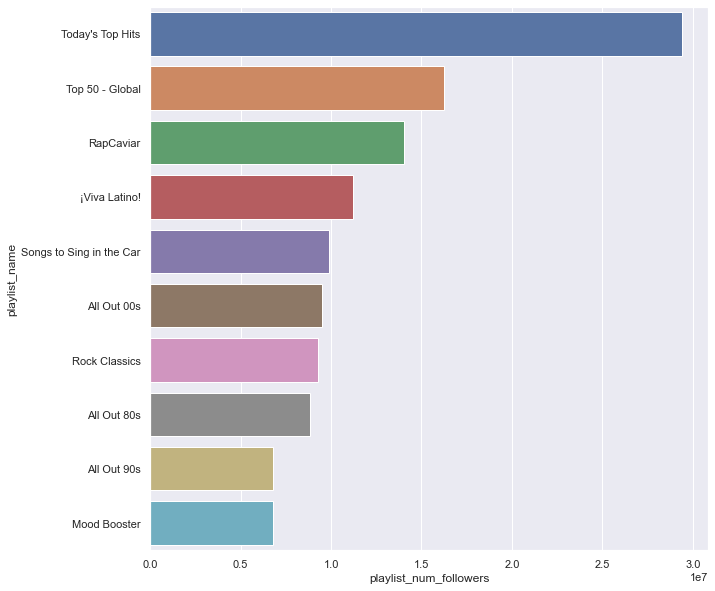

In [26]:
temp = pd_playlist.sort_values(by=['playlist_num_followers'], ascending=False)
top_num = 10
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="playlist_num_followers", y="playlist_name", data=temp[:top_num])

**Câu 5 :** Playlist nào có số lượng bài hát là nhiều nhất 

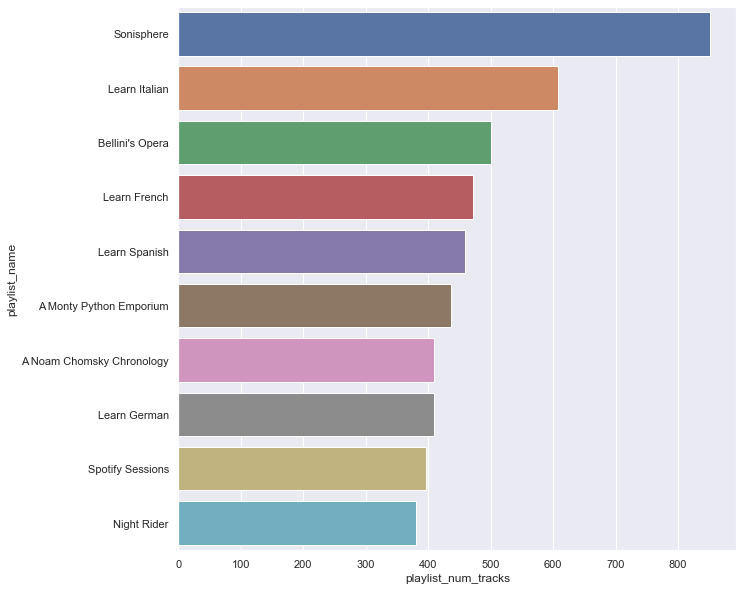

In [27]:
temp = pd_playlist.sort_values(by=['playlist_num_tracks'], ascending=False)
top_num = 10
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="playlist_num_tracks", y="playlist_name", data=temp[:top_num])

**Câu 6 :** Nhận xét về mức độ tương quan của các thông tin audio với nhau

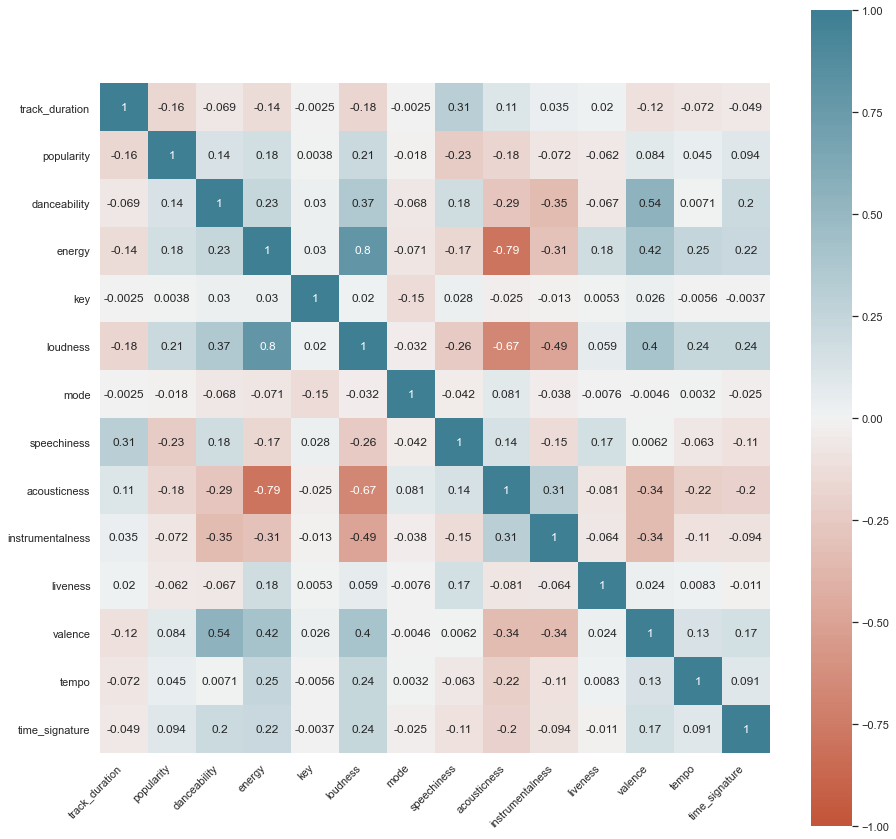

In [28]:
names = list(pd_track.select_dtypes(np.number).columns)

data = pd_track[names]

corr = data.corr()
# plot correlation matrix
plt.figure(figsize=(15, 15))
ax = sns.heatmap(
    corr, annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Câu 7 :** Các bài hát sẽ có mức độ phổ biến tương quan như thế nào với các đặc trưng audio

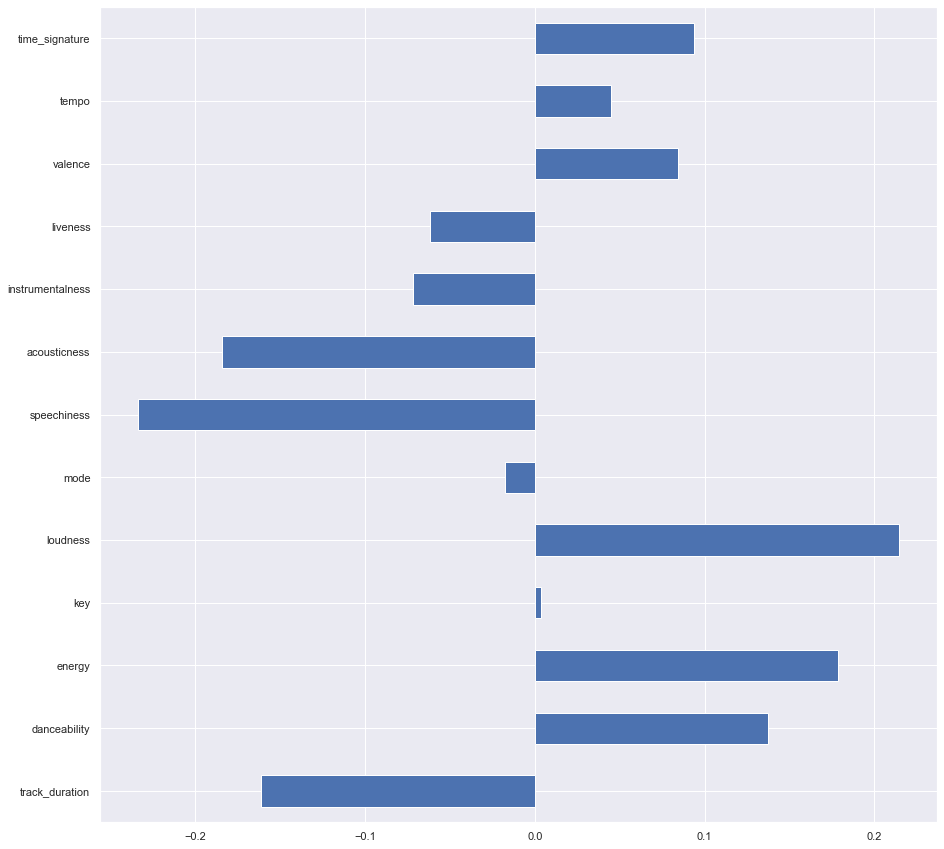

In [29]:
corr = pd_track.select_dtypes(np.number).corr()['popularity'][:]
corr = corr.drop('popularity')
plt.figure(figsize=(15,15))
corr.plot.barh()
plt.show()

Mức độ phổ biến có xu hướng nghịch biến nhiều nhất với thuộc tính `speechiness` , tương đương với các audio nói, và tương quan đồng biến nhiều nhất với thuộc tính `loudness`

**Câu 8:** Nhóm nhạc nào có tham gia nhiều track nhất

D:\Anaconda\envs\min_ds-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


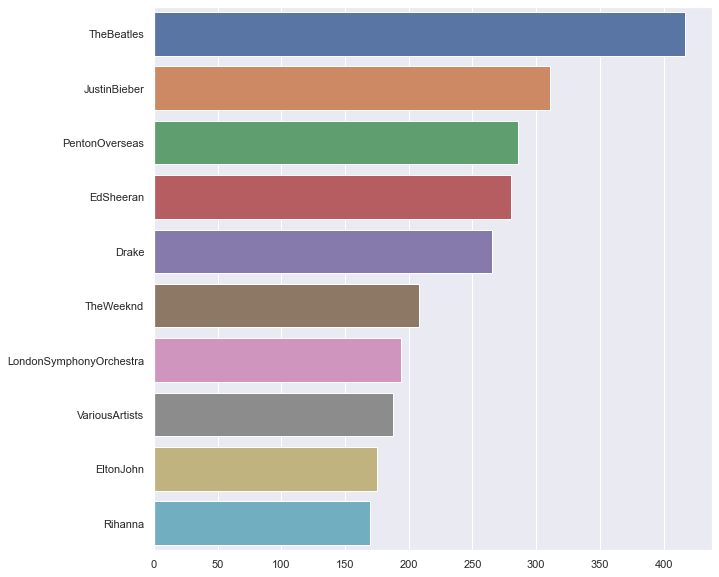

In [30]:
import re
pat = r"[*' ']*"
a = pd_track['artist_names'].str.split(',').explode()
a = a.replace(pat,'',  regex=True)
a = a.str.replace('[','', regex=False)
a = a.str.replace(']','', regex=False)

top_num = 10
top = a.value_counts()[:top_num]
plt.figure(figsize=(10, 10))
# top.index
ax = sns.barplot(top.values, top.index)